In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('traffic_data.csv')

# Display the first few rows of the DataFrame
df.head()

,Roadblock,Time,Weather,Road Infrastructure,Types of Roads,Traffic Volume,Severity of Traffic
0,full-blockage,night,snow/storm,good,local,1000+,very-high
1,full-blockage,morning,light-rain,bad,local,500-749,very-high
2,full-blockage,morning,foggy,good,freeway,500-749,medium
3,partial-roadwork,early-morning,light-rain,bad,local,500-749,high
4,minor-accident,evening,foggy,good,collector,500-749,medium


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Create a label encoder object
le = LabelEncoder()

# Apply the label encoder to each column
df['Roadblock'] = le.fit_transform(df['Roadblock'])
df['Time'] = le.fit_transform(df['Time'])
df['Weather'] = le.fit_transform(df['Weather'])
df['Road Infrastructure'] = le.fit_transform(df['Road Infrastructure'])
df['Types of Roads'] = le.fit_transform(df['Types of Roads'])
df['Traffic Volume'] = le.fit_transform(df['Traffic Volume'])
df['Severity of Traffic'] = le.fit_transform(df['Severity of Traffic'])

# Split the data into training and testing sets
X = df.drop('Severity of Traffic', axis=1)
y = df['Severity of Traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Increased LSTM units
model.add(Dropout(0.3)) # Increased dropout rate
model.add(LSTM(200, return_sequences=True)) # Added another LSTM layer with increased units
model.add(Dropout(0.3)) # Increased dropout rate
model.add(LSTM(100, return_sequences=False)) # Increased LSTM units
model.add(Dropout(0.3)) # Increased dropout rate
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Define early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False, callbacks=[es]) # Increased epochs

# Evaluate the model loss
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Print the model loss
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

# Save the model
model.save('traffic_model')
model.save('traffic_model.h5')


Epoch 1/300
12/12 - 5s - loss: 1.2340 - val_loss: 1.1555 - 5s/epoch - 376ms/step
Epoch 2/300
12/12 - 0s - loss: 1.1402 - val_loss: 1.0699 - 107ms/epoch - 9ms/step
Epoch 3/300
12/12 - 0s - loss: 1.0795 - val_loss: 1.0433 - 116ms/epoch - 10ms/step
Epoch 4/300
12/12 - 0s - loss: 1.0643 - val_loss: 1.0466 - 112ms/epoch - 9ms/step
Epoch 5/300
12/12 - 0s - loss: 1.0432 - val_loss: 1.0520 - 116ms/epoch - 10ms/step
Epoch 6/300
12/12 - 0s - loss: 1.0371 - val_loss: 1.0630 - 126ms/epoch - 11ms/step
Epoch 7/300
12/12 - 0s - loss: 1.0346 - val_loss: 1.0577 - 120ms/epoch - 10ms/step
Epoch 8/300
12/12 - 0s - loss: 1.0280 - val_loss: 1.0530 - 134ms/epoch - 11ms/step
Epoch 9/300
12/12 - 0s - loss: 1.0094 - val_loss: 1.0491 - 117ms/epoch - 10ms/step
Epoch 10/300
12/12 - 0s - loss: 1.0140 - val_loss: 1.0447 - 112ms/epoch - 9ms/step
Epoch 11/300
12/12 - 0s - loss: 1.0208 - val_loss: 1.0455 - 113ms/epoch - 9ms/step
Epoch 12/300
12/12 - 0s - loss: 1.0145 - val_loss: 1.0408 - 110ms/epoch - 9ms/step
Epoch 13

INFO:tensorflow:Assets written to: traffic_model\assets
c:\Users\Lynn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 1s 2ms/step


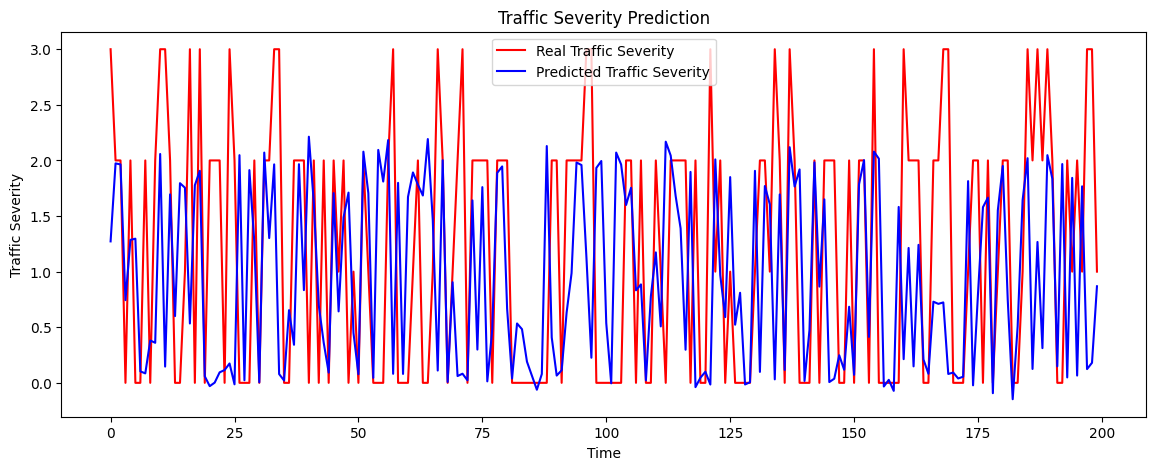

In [22]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model
model = load_model('traffic_model.h5')

# Predict the traffic severity
y_pred = model.predict(X_test)

# Reshape y_pred. y_test is already a numpy array, so no need to convert
y_pred = y_pred.reshape(y_pred.shape[0])

# Plot actual vs predicted
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Traffic Severity')
plt.plot(y_pred, color = 'blue', label = 'Predicted Traffic Severity')
plt.title('Traffic Severity Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Severity')
plt.legend()
plt.show()
